In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el archivo CSV
data = pd.read_csv('Valhalla23.csv')

In [13]:
# Separar los datos
train_data = data.sample(frac=0.8, random_state=42)
test_data = data.drop(train_data.index)

In [14]:
X_train = train_data['Celsius'].values
y_train = train_data['Valks'].values
X_test = test_data['Celsius'].values
y_test = test_data['Valks'].values

In [15]:
# Normalizar los datos
X_train_mean = np.mean(X_train)
X_train_std = np.std(X_train)
X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std

In [16]:
# Agregar término cuadrático (polinomialización de grado 2)
X_train_poly = np.column_stack((X_train, X_train**2))
X_test_poly = np.column_stack((X_test, X_test**2))

In [17]:
# Inicializar los parámetros aleatoriamente
np.random.seed(42)  # Para reproducibilidad
slope = np.random.randn(2)  # Dos parámetros para X y X^2
intercept = np.random.randn()

# Definir la tasa de aprendizaje, el número de iteraciones y el parámetro de regularización
learning_rate = 0.01
iterations = 1000
lambda_reg = 0.01

In [18]:
# Implementar el descenso de gradiente
for i in range(iterations):
    # Calcular la predicción
    y_pred_train = X_train_poly.dot(slope) + intercept

    # Calcular los gradientes
    d_slope = (-2/len(X_train_poly)) * X_train_poly.T.dot(y_train - y_pred_train) + 2 * lambda_reg * slope
    d_intercept = (-2/len(X_train_poly)) * sum(y_train - y_pred_train)

    # Actualizar los parámetros
    slope -= learning_rate * d_slope
    intercept -= learning_rate * d_intercept

    # Calcular la función de costo (MSE) y almacenarla
    cost = np.mean((y_train - y_pred_train) ** 2)

In [19]:
#Calcular la predicción para el conjunto de prueba
y_pred_test = X_test_poly.dot(slope) + intercept

# Calcular la función de costo (MSE) para entrenamiento y prueba
train_cost = np.mean((y_train - y_pred_train) ** 2)
test_cost = np.mean((y_test - y_pred_test) ** 2)

In [20]:
print(f"Costo de Entrenamiento: {train_cost}")
print(f"Costo de Prueba: {test_cost}")

Costo de Entrenamiento: 37.36590336904194
Costo de Prueba: 83.15636479464152


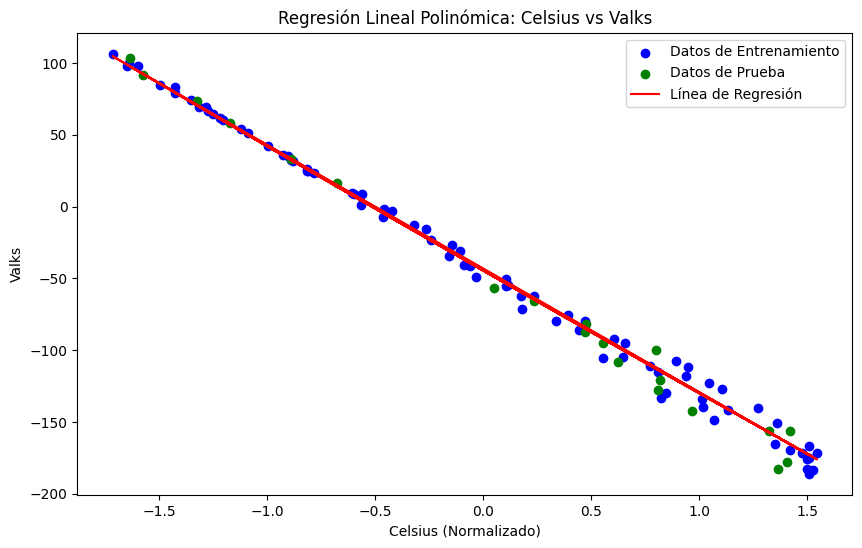

In [21]:
# Graficar los resultados del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Datos de Entrenamiento')
plt.scatter(X_test, y_test, color='green', label='Datos de Prueba')
plt.plot(X_train, X_train_poly.dot(slope) + intercept, color='red', label='Línea de Regresión')
plt.xlabel('Celsius (Normalizado)')
plt.ylabel('Valks')
plt.title('Regresión Lineal Polinómica: Celsius vs Valks')
plt.legend()
plt.show()

In [22]:
# Create a table comparing actual and predicted values for the test set
results = pd.DataFrame({
    'Celsius': X_test,
    'Actual Valks': y_test,
    'Predicted Valks': y_pred_test
})

# Display the first few rows of the results
print(results.head())

    Celsius  Actual Valks  Predicted Valks
0  1.325829      -156.600      -157.518408
1 -1.323682        73.269        70.337450
2  0.966881      -142.490      -127.139579
3  0.475152       -81.557       -85.273575
4 -1.634209       103.460        97.590810


In [25]:
!jupyter nbconvert --to html 'Valhalla.ipynb'

[NbConvertApp] Converting notebook Valhalla.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 351224 bytes to Valhalla.html
